In [116]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

Проанализируем несколько временных рядов, которые не были разобраны на практическом занятии

In [117]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [118]:
#Функция для оценнки стационарности ряда по Дики-Фуллеру
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    dfoutput['The maximized information criterion'] = out[5]
    print(dfoutput)

In [119]:
#Отрисовка временного ряда с тестом Дики-Фулерра
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

#### Проанализируем график продаж компании х. Примем уровень значимости альфа = 0.05. Во временном ряду наблюдается небольшой положительный тренд, а также сезонность. Тест Дики-Фуллера подтвердает нулевую гипотезу о стационарности ряда

In [120]:
sales_of_company_series = sales_of_company_x['Count']

Results of Dickey-Fuller Test:
Test Statistic                           0.654715
p-value                                  0.988889
Lags Used                               12.000000
Number of Observations Used             64.000000
Critical Value (1%)                     -3.536928
Critical Value (5%)                     -2.907887
Critical Value (10%)                    -2.591493
The maximized information criterion    694.869106
dtype: float64


C:\Users\Tomuch\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


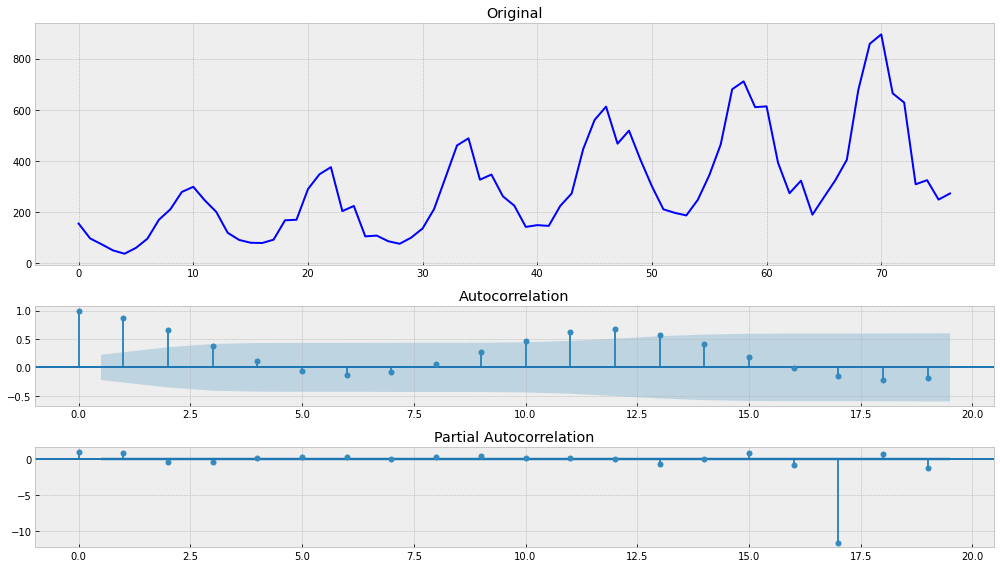

In [121]:
tsplot(sales_of_company_series)

#### Небольшой тренд можно убрать дифференцированием. Несмотря на небольшую автокорреляцию, тест Дики-Фуллера отвергает нулевую гипотезу о нестационарности ряда (p-value 0.000091 << а 0.05).

In [122]:
sales_of_company_series_diff = sales_of_company_series.diff()
sales_of_company_series_diff[0] = sales_of_company_series[0]

Results of Dickey-Fuller Test:
Test Statistic                          -4.681566
p-value                                  0.000091
Lags Used                               11.000000
Number of Observations Used             65.000000
Critical Value (1%)                     -3.535217
Critical Value (5%)                     -2.907154
Critical Value (10%)                    -2.591103
The maximized information criterion    694.869106
dtype: float64


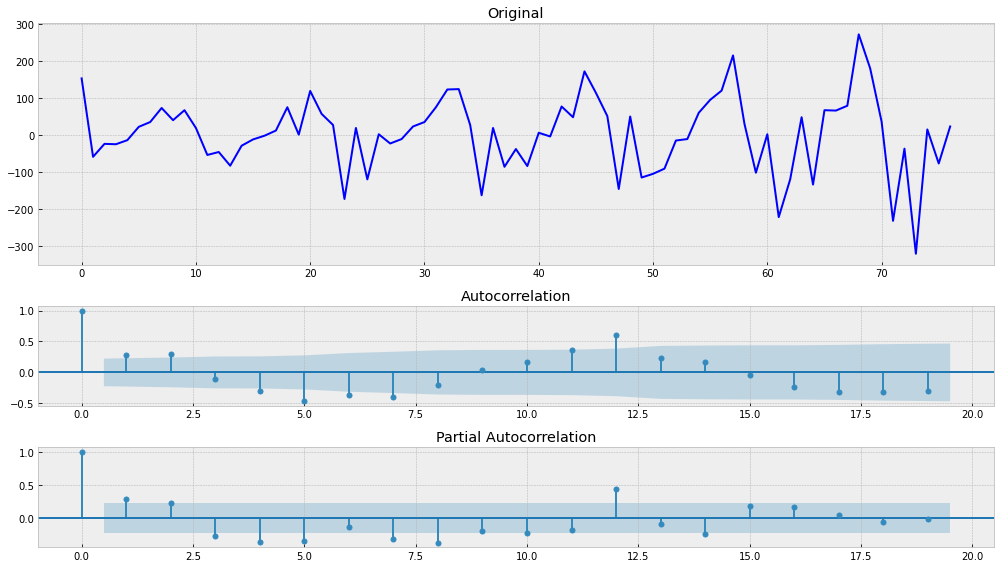

In [123]:
tsplot(sales_of_company_series_diff)

#### Проанализируем среднемесячную температуру. Тренд отсутсвует, наблюдается сильная цикличность, при этом p-value в тесте Дики-Фуллера равно 0.016, что меньше уровня значимости и данный ряд можно считать стационарным

In [127]:
mean_monthly_temp_series = mean_monthly_temp['Deg']

Results of Dickey-Fuller Test:
Test Statistic                          -3.255492
p-value                                  0.016989
Lags Used                               14.000000
Number of Observations Used            225.000000
Critical Value (1%)                     -3.459752
Critical Value (5%)                     -2.874473
Critical Value (10%)                    -2.573663
The maximized information criterion    694.869106
dtype: float64


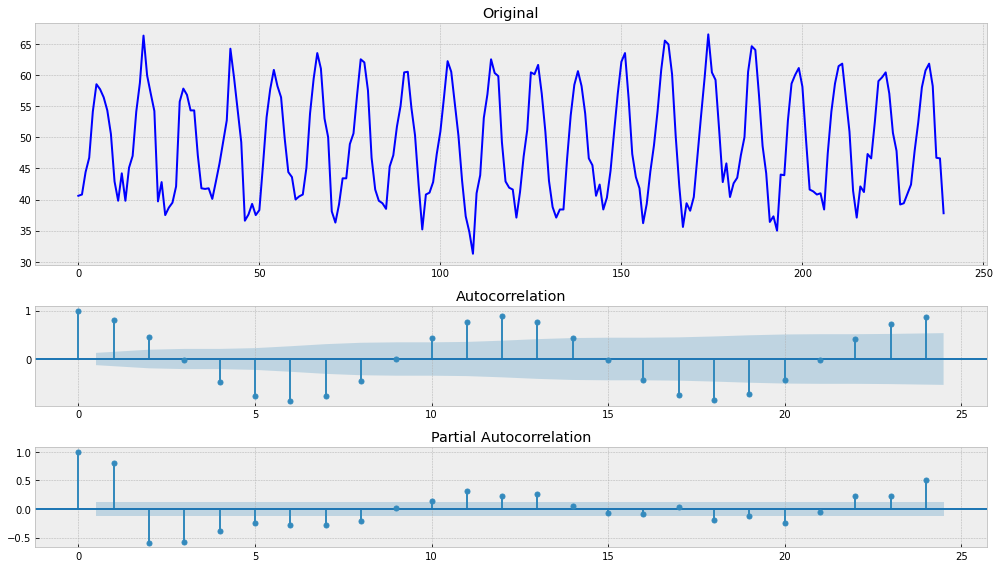

In [128]:
tsplot(mean_monthly_temp_series)

#### Проанализируем график закрытия индекса Dowjones, как таковой тренд и цикличность отсуствует, но наблюдает сильная автокорреляция.

Results of Dickey-Fuller Test:
Test Statistic                          -1.314625
p-value                                  0.622455
Lags Used                                0.000000
Number of Observations Used            161.000000
Critical Value (1%)                     -3.471633
Critical Value (5%)                     -2.879665
Critical Value (10%)                    -2.576434
The maximized information criterion    694.869106
dtype: float64


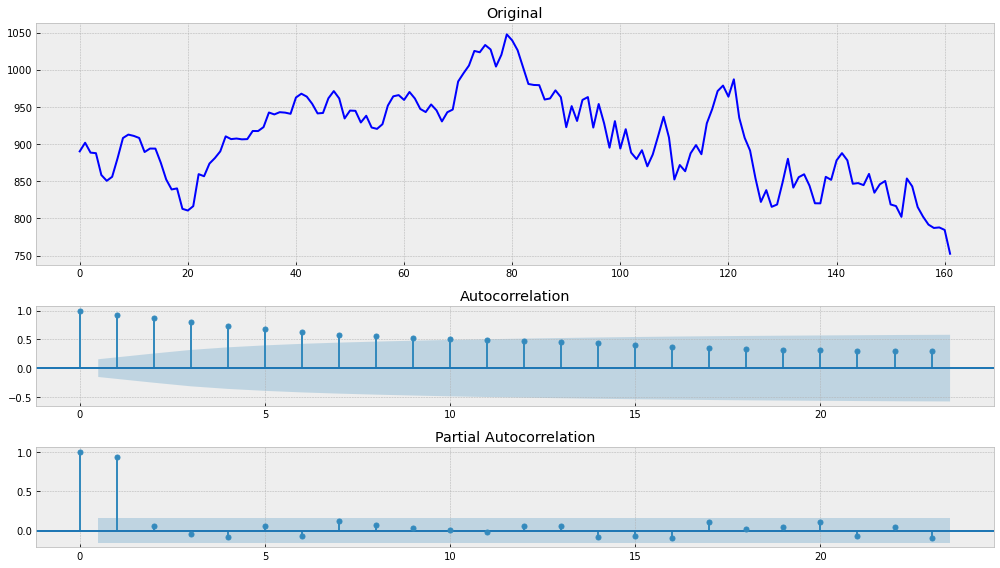

In [141]:
dowjones_closing_series = dowjones_closing['Close']
tsplot(dowjones_closing_series)

#### Дифференцированием со сдвигом один превращаем ряд в стационарный, при этом отбрасывая первое получившиеся NaN значение

In [163]:
dowjones_closing_series_ = dowjones_closing_series.diff(1)
dowjones_closing_series_.dropna(inplace = True)

Results of Dickey-Fuller Test:
Test Statistic                        -1.302521e+01
p-value                                2.407586e-24
Lags Used                              0.000000e+00
Number of Observations Used            1.600000e+02
Critical Value (1%)                   -3.471896e+00
Critical Value (5%)                   -2.879780e+00
Critical Value (10%)                  -2.576495e+00
The maximized information criterion    6.948691e+02
dtype: float64


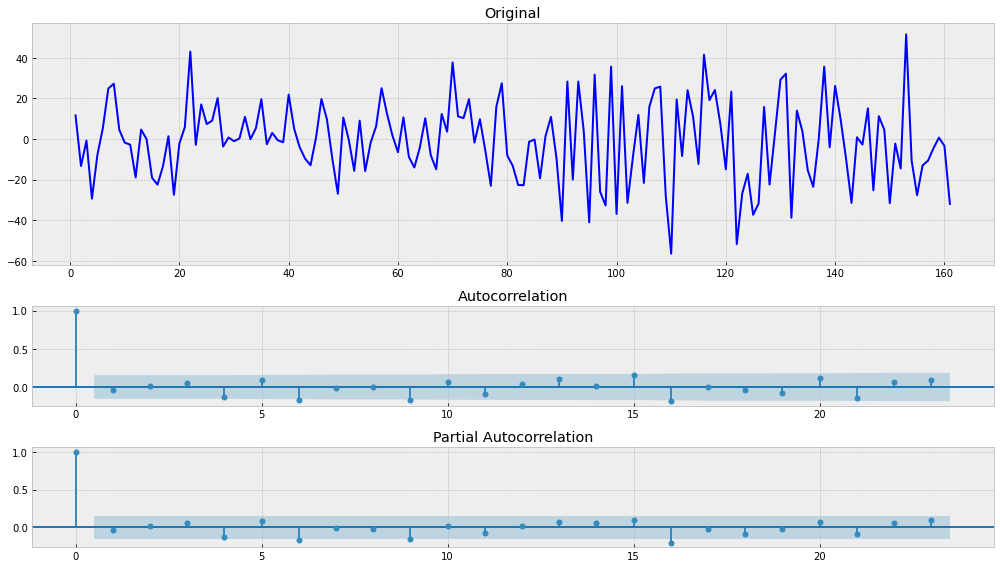

In [165]:
tsplot(dowjones_closing_series_)

#### Проанализируем количество дней рождений. Тренд отсутсвует, цикличность и сезонность тоже,  p-value в тесте Дики-Фуллера равно 0.000052, что меньше уровня значимости и данный ряд можно считать стационарным.

Results of Dickey-Fuller Test:
Test Statistic                          -4.808291
p-value                                  0.000052
Lags Used                                6.000000
Number of Observations Used            358.000000
Critical Value (1%)                     -3.448749
Critical Value (5%)                     -2.869647
Critical Value (10%)                    -2.571089
The maximized information criterion    694.869106
dtype: float64


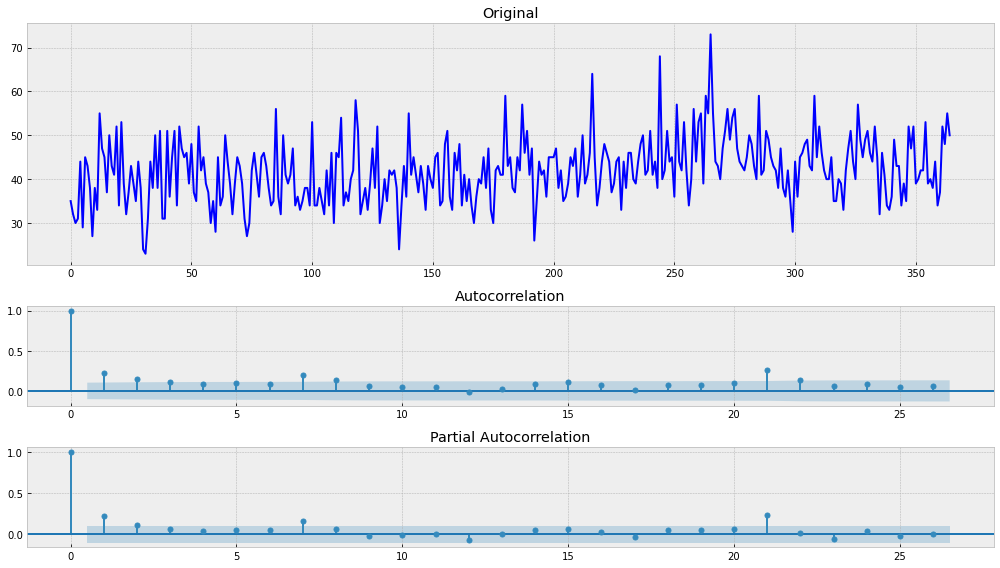

In [168]:
female_births_series = female_births['Count']
tsplot(female_births_series)